<a href="https://colab.research.google.com/github/uranchung/K-S2S-for-Extreme/blob/main/Exercise_plot/test_Lineplot_t2m_w3_90th_extreme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot Anomalously High Temperature**


**[90퍼센타일을 초과하는 날에 대한 선 그래프]**

자료 1과 2: 또한, 초기 날짜 기반으로 2023년 (버전 2016의 경우 2012년)에서 90퍼센타일을 초과하는 날에 대한 선 그래프를 표출했다.
버전 2024년의 경우, 2004년부터 2023년까지의 평년 평균 기온은 초록색 선, 90퍼센타일을 초과하는 평년 평균 기온은 빨강색 선, 2023년의 평균 기온은 검정색 선으로 표출했는데, 이때, 2023년 대비 90퍼센타일을 초과하는 평년 평균 기온을 초과하는 경우에 대해서는 빨강색 면적으로 표출했다.

**You will need to mount your Google Drive to practice.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
mount_Dir = '/content/gdrive/My Drive/Colab Notebooks/'
print(mount_Dir)

/content/gdrive/My Drive/Colab Notebooks/


In [ ]:
main_Dir = mount_Dir + 'Extreme_ECMWF_SK/'
print(main_Dir)

/content/gdrive/My Drive/Colab Notebooks/Extreme_ECMWF_SK/


* need install **cartopy**

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.2 MB/s eta 0:00:00


* then, to read & open nc files in CoLab, you'll first need to import the **xarray**, **numpy**, erc libraries.

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
## nc file path
input_file = xr.open_dataset(main_Dir + 'S2S_ECMWF_hindcast_T2M_w3_nb-mean_2004-2023.nc')
threshold_file = xr.open_dataset(main_Dir + 'S2S_ECMWF_hindcast_T2M_w3_clim90th.nc')

In [ ]:
## define out path
out_path = main_Dir
out_fileName = out_path + 'Lineplot_t2m_90th_Extreme2023.png'

In [ ]:
# 먼저 지점 좌표 선택
lat, lon = 36.0, 127.5
t2m_point = input_file['t2m'].sel(latitude=lat, longitude=lon, method='nearest')

In [ ]:
# 온도를 °C로 변환 (K → °C)
t2m_point = t2m_point - 273.15
# DOY 추가
t2m_point = t2m_point.assign_coords(doy=("time", t2m_point['time'].dt.dayofyear.values))

In [ ]:
# 평년(mean) 계산 (2004–2022)
t2m_clim_mean = t2m_point.sel(time=slice("2004", "2022")).groupby("doy").mean("time")

In [ ]:
# 90th percentile threshold 불러오기
thr_point = threshold_file['t2m_clim90th'].sel(latitude=lat, longitude=lon, method='nearest') - 273.15

**Extreme of 2023**

In [ ]:
# 2023년 데이터 선택
t2m_2023 = t2m_point.sel(time=slice("2023-01-01", "2023-12-31"))

In [ ]:
# doy 기준으로 threshold 매칭
thr_for_2023 = thr_point.sel(doy=t2m_2023['doy'])
# 이벤트 구간
extreme = t2m_2023 > thr_for_2023

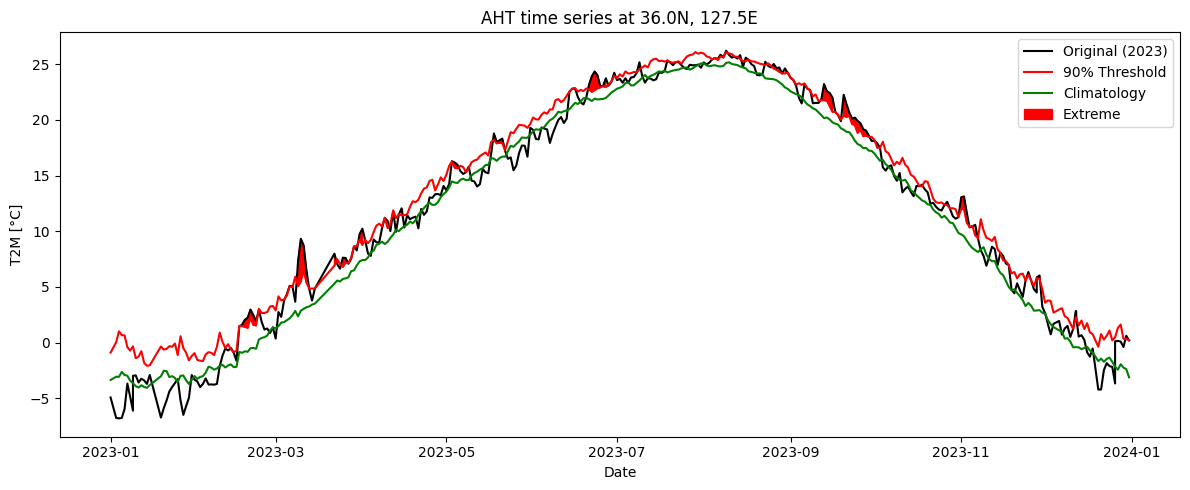

In [ ]:
# 그림
plt.figure(figsize=(12,5))
plt.plot(t2m_2023['time'], t2m_2023, color='k', label='Original (2023)')
plt.plot(t2m_2023['time'], thr_for_2023, color='r', label='90% Threshold')
plt.plot(t2m_2023['time'], t2m_clim_mean.sel(doy=t2m_2023['doy']), color='g', label='Climatology')

# 음영 (Extreme)
plt.fill_between(t2m_2023['time'].values, t2m_2023.values, thr_for_2023.values, where=extreme.values, color='red', label='Extreme')

plt.title('AHT time series at 36.0N, 127.5E')
plt.xlabel('Date'); plt.ylabel('T2M [°C]')
plt.legend()
plt.tight_layout()
plt.savefig(out_fileName, dpi=300, bbox_inches='tight')
plt.show()